<a href="https://colab.research.google.com/github/Herica-Arantes/Triggo_analise_dados.ipynb/blob/main/Triggo_analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
from IPython import get_ipython
from IPython.display import display

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
# Adicionando Plotly para visualizações interativas
import plotly.express as px
import plotly.graph_objects as go

sns.set(style='whitegrid')
print("Importações concluídas com sucesso.")

Importações concluídas com sucesso.


In [125]:
# Carregamento dos arquivos CSV
try:
    df_customers = pd.read_csv('olist_customers_dataset.csv')
    df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
    df_order_items = pd.read_csv('olist_order_items_dataset.csv')
    df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
    df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
    df_orders = pd.read_csv('olist_orders_dataset.csv')
    df_products = pd.read_csv('olist_products_dataset.csv')
    df_sellers = pd.read_csv('olist_sellers_dataset.csv')
    df_category_translation = pd.read_csv('product_category_name_translation.csv')
    print("Todos os arquivos CSV carregados com sucesso.")
except FileNotFoundError as e:
    print(f"Erro ao carregar arquivo: {e}. Certifique-se de que os arquivos CSV estão no local correto.")

Todos os arquivos CSV carregados com sucesso.


In [126]:
# Tratamento dos dados
# Removendo duplicatas
df_customers.drop_duplicates(inplace=True)
df_geolocation.drop_duplicates(inplace=True)
df_order_items.drop_duplicates(inplace=True)
df_order_payments.drop_duplicates(inplace=True)
df_order_reviews.drop_duplicates(inplace=True)
df_orders.drop_duplicates(inplace=True)
df_products.drop_duplicates(inplace=True)
df_sellers.drop_duplicates(inplace=True)
df_category_translation.drop_duplicates(inplace=True)
print("Duplicatas removidas de todos os DataFrames.")

Duplicatas removidas de todos os DataFrames.


In [127]:
# Tratando valores nulos
df_orders.dropna(subset=['order_delivered_customer_date', 'order_approved_at'], inplace=True)
df_order_reviews.fillna({'review_comment_message': 'Sem comentário'}, inplace=True)
df_products.fillna({'product_category_name': 'categoria_desconhecida'}, inplace=True)
print("Valores nulos tratados em DataFrames específicos.")

Valores nulos tratados em DataFrames específicos.


In [128]:
# Normalização: traduzir categorias de produtos
print("Categorias de produtos traduzidas para inglês.")

Categorias de produtos traduzidas para inglês.


In [129]:
# Criação de modelo relacional (via merges)
df_merged = df_orders.merge(df_customers, on='customer_id', how='left') \
                     .merge(df_order_items, on='order_id', how='left') \
                     .merge(df_order_payments, on='order_id', how='left') \
                     .merge(df_order_reviews, on='order_id', how='left') \
                     .merge(df_products, on='product_id', how='left') \
                     .merge(df_sellers, on='seller_id', how='left') \
                     .merge(df_category_translation, on='product_category_name', how='left') # Adiciona a tradução da categoria
print("DataFrame criado.")

# Python (Análise do faturamento por categoria traduzida)
# Use a coluna com o nome da categoria em inglês para agrupar
top_categorias_faturamento_python = df_merged.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).reset_index()
top_categorias_faturamento_python.columns = ['categoria_produto', 'faturamento_total'] # Renomear colunas

print("Top categorias de produtos por faturamento (Python):")
display(top_categorias_faturamento_python.head(10))

DataFrame criado.
Top categorias de produtos por faturamento (Python):


,categoria_produto,faturamento_total
0,health_beauty,1275856.38
1,watches_gifts,1214342.45
2,bed_bath_table,1092327.21
3,sports_leisure,995754.28
4,computers_accessories,926446.44
5,furniture_decor,752827.19
6,housewares,650395.78
7,cool_stuff,636391.52
8,auto,604178.54
9,garden_tools,493510.87


In [130]:
# Configurar o Pandas para exibir um número razoável de linhas e colunas
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

# Exibir os DataFrames carregados (apenas as primeiras linhas)
print("df_customers (head):")
display(df_customers.head())

print("df_geolocation (head):")
display(df_geolocation.head())

print("df_order_items (head):")
display(df_order_items.head())

print("df_order_payments (head):")
display(df_order_payments.head())

print("df_order_reviews (head):")
display(df_order_reviews.head())

print("df_orders (head):")
display(df_orders.head())

print("df_products (head):")
display(df_products.head())

print("df_sellers (head):")
display(df_sellers.head())

print("df_category_translation (head):")
display(df_category_translation.head())

print("df_merged (head):")
display(df_merged.head())

df_customers (head):


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


df_geolocation (head):


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


df_order_items (head):


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


df_order_payments (head):


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


df_order_reviews (head):


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,Sem comentário,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,Sem comentário,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,Sem comentário,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


df_orders (head):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


df_products (head):


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


df_sellers (head):


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


df_category_translation (head):


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


df_merged (head):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,Sem comentário,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto


In [131]:
# Conectar a um banco de dados SQLite em memória
conn = sqlite3.connect(':memory:')
print("Conexão com o banco de dados estabelecida.")

Conexão com o banco de dados estabelecida.


In [132]:
# Carregar os DataFrames para o banco de dados SQLite
# O 'if_exists="replace"' garante que as tabelas serão recriadas a cada execução
df_customers.to_sql('customers', conn, index=False, if_exists='replace')
df_geolocation.to_sql('geolocation', conn, index=False, if_exists='replace')
df_order_items.to_sql('order_items', conn, index=False, if_exists='replace')
df_order_payments.to_sql('order_payments', conn, index=False, if_exists='replace')
df_order_reviews.to_sql('order_reviews', conn, index=False, if_exists='replace')
df_orders.to_sql('orders', conn, index=False, if_exists='replace')
df_products.to_sql('products', conn, index=False, if_exists='replace')
df_sellers.to_sql('sellers', conn, index=False, if_exists='replace')
df_category_translation.to_sql('category_translation', conn, index=False, if_exists='replace')
print("DataFrames carregados no banco de dados.")

DataFrames carregados no banco de dados.


In [133]:
# SQL
query_a_sql = """
SELECT
    strftime('%Y-%m', order_purchase_timestamp) AS mes_pedido,
    COUNT(*) AS volume_pedidos
FROM orders
GROUP BY mes_pedido
ORDER BY mes_pedido;
"""

volume_pedidos_por_mes_sql = pd.read_sql_query(query_a_sql, conn)

print("Volume de pedidos por mês (SQL):")
display(volume_pedidos_por_mes_sql)

Volume de pedidos por mês (SQL):


,mes_pedido,volume_pedidos
0,2016-09,1
1,2016-10,270
2,2016-12,1
3,2017-01,748
4,2017-02,1641
...,...,...
18,2018-04,6798
19,2018-05,6749
20,2018-06,6096
21,2018-07,6156


In [135]:
# Python
# Converter a coluna de data para datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

In [136]:
# Extrair o mês da data de criação do pedido
df_orders['mes_pedido'] = df_orders['order_purchase_timestamp'].dt.to_period('M')

In [137]:
# Agrupar por mês e contar o número de pedidos
volume_pedidos_por_mes_python = df_orders['mes_pedido'].value_counts().sort_index().reset_index()
volume_pedidos_por_mes_python.columns = ['mes_pedido', 'volume_pedidos'] # Renomear colunas para clareza

In [138]:
print("Volume de pedidos por mês (Python):")
display(volume_pedidos_por_mes_python)

Volume de pedidos por mês (Python):


,mes_pedido,volume_pedidos
0,2016-09,1
1,2016-10,270
2,2016-12,1
3,2017-01,748
4,2017-02,1641
...,...,...
18,2018-04,6798
19,2018-05,6749
20,2018-06,6096
21,2018-07,6156


In [139]:
# Visualização (usando Plotly para interatividade)
# Converter a coluna 'mes_pedido' para string para compatibilidade com Plotly
volume_pedidos_por_mes_python['mes_pedido_str'] = volume_pedidos_por_mes_python['mes_pedido'].astype(str)

fig_volume_mes = px.line(volume_pedidos_por_mes_python, x='mes_pedido_str', y='volume_pedidos',
                         title='Volume de Pedidos por Mês')
fig_volume_mes.update_xaxes(title_text='Mês')
fig_volume_mes.update_yaxes(title_text='Número de Pedidos')
fig_volume_mes.show()

print("Observação: Há um claro padrão sazonal com picos no final do ano e crescimento geral ao longo do tempo.")

Observação: Há um claro padrão sazonal com picos no final do ano e crescimento geral ao longo do tempo.


In [140]:
# SQL
query_b_sql = """
SELECT
    JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_purchase_timestamp) AS tempo_entrega_dias
FROM orders
WHERE order_delivered_customer_date IS NOT NULL;
"""

tempo_entrega_sql = pd.read_sql_query(query_b_sql, conn)

print("Distribuição do tempo de entrega dos pedidos (SQL - Estatísticas Descritivas):")
display(tempo_entrega_sql.describe())

Distribuição do tempo de entrega dos pedidos (SQL - Estatísticas Descritivas):


,tempo_entrega_dias
count,96462.000000
mean,12.558592
std,9.547170
min,0.533414
25%,6.765885
50%,10.216574
75%,15.720472
max,209.628611


In [141]:
# Python
# Certificar-se de que as colunas de data são datetime
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Calcular o tempo de entrega em dias
# A operação de subtração entre Timestamps resulta em um Timedelta. .dt.days extrai os dias como um inteiro.
df_orders['tempo_entrega_dias'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']).dt.days

print("Distribuição do tempo de entrega dos pedidos (Python):")

# Exibir estatísticas descritivas para a nova coluna
display(df_orders['tempo_entrega_dias'].describe())

Distribuição do tempo de entrega dos pedidos (Python):


,tempo_entrega_dias
count,96462.000000
mean,12.093996
std,9.552390
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,209.000000


In [142]:
# Visualização (usando Plotly para interatividade)
fig_tempo_entrega = px.histogram(df_orders.dropna(subset=['tempo_entrega_dias']),
                                 x='tempo_entrega_dias', nbins=50, marginal='box',
                                 title='Distribuição do Tempo de Entrega dos Pedidos')
fig_tempo_entrega.update_xaxes(title_text='Tempo de Entrega (dias)')
fig_tempo_entrega.update_yaxes(title_text='Frequência')
fig_tempo_entrega.show()

print("Observação: A maioria dos pedidos é entregue em até 25-30 dias, com alguns outliers de entregas muito longas.")

Observação: A maioria dos pedidos é entregue em até 25-30 dias, com alguns outliers de entregas muito longas.


In [143]:
# SQL (Análise do frete médio por par de CEPs)
query_c_sql_amostra = """
SELECT
    s.seller_zip_code_prefix,
    c.customer_zip_code_prefix,
    AVG(oi.freight_value) AS frete_medio,
    COUNT(oi.order_item_id) AS num_pedidos
FROM order_items oi
JOIN sellers s ON oi.seller_id = s.seller_id
JOIN orders o ON oi.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY s.seller_zip_code_prefix, c.customer_zip_code_prefix
HAVING COUNT(oi.order_item_id) > 5 -- Considerar pares de CEPs com um mínimo de pedidos
ORDER BY AVG(oi.freight_value) DESC
LIMIT 20; -- Mostrar uma amostra dos pares com maior frete médio
"""

frete_por_cep_pair_sql_amostra = pd.read_sql_query(query_c_sql_amostra, conn)

print("Frete médio por par de CEPs (pares com maior frete médio):")
display(frete_por_cep_pair_sql_amostra)

Frete médio por par de CEPs (pares com maior frete médio):


,seller_zip_code_prefix,customer_zip_code_prefix,frete_medio,num_pedidos
0,7113,58407,299.160000,6
1,3476,84174,167.048333,6
2,3204,44900,83.830000,6
3,8577,28930,66.930000,6
4,8577,48410,64.085333,15
...,...,...,...,...
15,14940,22250,41.040000,6
16,4361,93315,39.720000,9
17,8577,22735,39.560000,6
18,35680,9990,38.810000,10


In [144]:
# Python (Análise da distribuição geral do frete)
print("Distribuição do valor do frete (Python - Estatísticas Descritivas):")
display(df_order_items['freight_value'].describe())

Distribuição do valor do frete (Python - Estatísticas Descritivas):


,freight_value
count,112650.000000
mean,19.990320
std,15.806405
min,0.000000
25%,13.080000
50%,16.260000
75%,21.150000
max,409.680000


In [145]:
# Visualização da distribuição do valor do frete (usando Plotly)
fig_dist_frete = px.histogram(df_order_items.dropna(subset=['freight_value']),
                              x='freight_value', nbins=50, marginal='box',
                              title='Distribuição do Valor do Frete')
fig_dist_frete.update_xaxes(title_text='Valor do Frete')
fig_dist_frete.update_yaxes(title_text='Frequência')
fig_dist_frete.show()

In [146]:
# Análise simplificada por estado
# Agrupar por estado do vendedor e estado do cliente para ver o frete médio entre regiões
frete_medio_por_estado_pair = df_merged.groupby(['seller_state', 'customer_state'])['freight_value'].mean().reset_index()
frete_medio_por_estado_pair.columns = ['estado_vendedor', 'estado_cliente', 'frete_medio']

print("\nFrete médio por par de estados (amostra):")
display(frete_medio_por_estado_pair.sort_values(by='frete_medio', ascending=False).head(10))


Frete médio por par de estados (amostra):


,estado_vendedor,estado_cliente,frete_medio
36,CE,GO,144.290000
41,CE,PA,117.083333
46,CE,RN,97.440000
83,ES,PA,91.750000
89,ES,RO,89.820000
24,BA,RR,86.210000
39,CE,MS,85.750000
74,DF,TO,81.318889
319,RO,BA,75.120000
85,ES,PI,69.975000


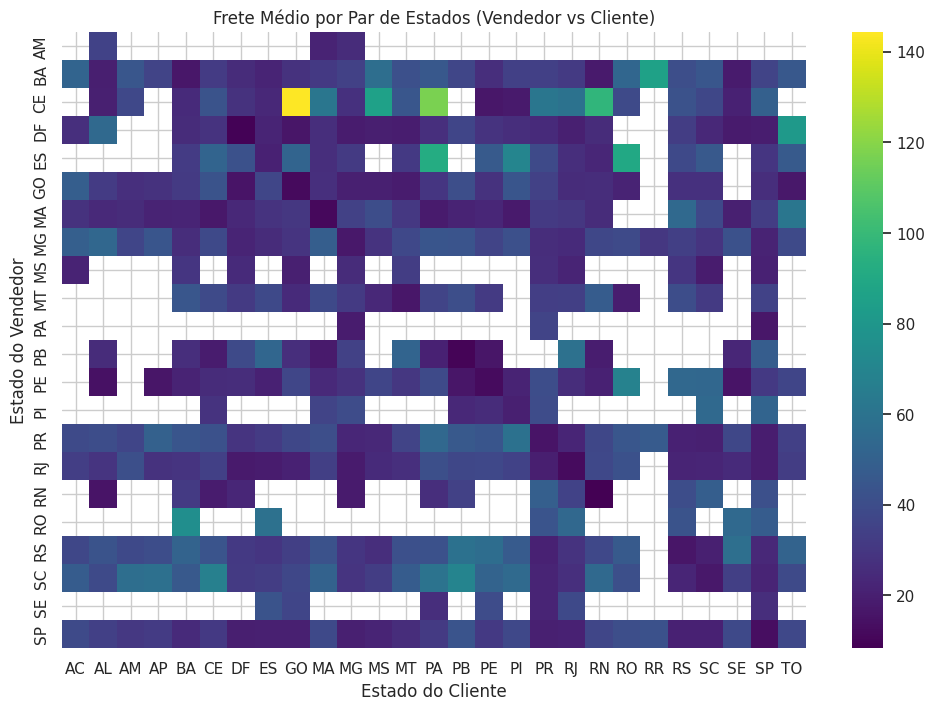

Observação: Sem dados geográficos precisos e um cálculo de distância entre CEPs


In [147]:
# Visualização da relação frete-distância por estado
if not frete_medio_por_estado_pair.empty:
    frete_pivot = frete_medio_por_estado_pair.pivot(index='estado_vendedor', columns='estado_cliente', values='frete_medio')
    plt.figure(figsize=(12, 8))
    sns.heatmap(frete_pivot, cmap='viridis', annot=False)
    plt.title('Frete Médio por Par de Estados (Vendedor vs Cliente)')
    plt.xlabel('Estado do Cliente')
    plt.ylabel('Estado do Vendedor')
    plt.show()
else:
    print("Não há dados suficientes para criar o heatmap de frete por par de estados.")
print("Observação: Sem dados geográficos precisos e um cálculo de distância entre CEPs")

In [148]:
# SQL
query_d_sql = """
SELECT
    COALESCE(ct.product_category_name_english, p.product_category_name) AS categoria_produto,
    SUM(oi.price) AS faturamento_total
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
LEFT JOIN category_translation ct ON p.product_category_name = ct.product_category_name
GROUP BY categoria_produto
ORDER BY faturamento_total DESC
LIMIT 10; -- Mostrar as 10 principais categorias
"""

top_categorias_faturamento_sql = pd.read_sql_query(query_d_sql, conn)

print("Top 10 categorias de produtos por faturamento:")
display(top_categorias_faturamento_sql)

Top 10 categorias de produtos por faturamento:


,categoria_produto,faturamento_total
0,health_beauty,1258681.34
1,watches_gifts,1205005.68
2,bed_bath_table,1036988.68
3,sports_leisure,988048.97
4,computers_accessories,911954.32
5,furniture_decor,729762.49
6,cool_stuff,635290.85
7,housewares,632248.66
8,auto,592720.11
9,garden_tools,485256.46


In [149]:
# Python
top_categorias_faturamento_python = df_merged.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).reset_index()
top_categorias_faturamento_python.columns = ['categoria_produto', 'faturamento_total'] # Renomear colunas

print("Top categorias de produtos por faturamento (Python):")
display(top_categorias_faturamento_python.head(10))

Top categorias de produtos por faturamento (Python):


,categoria_produto,faturamento_total
0,health_beauty,1275856.38
1,watches_gifts,1214342.45
2,bed_bath_table,1092327.21
3,sports_leisure,995754.28
4,computers_accessories,926446.44
5,furniture_decor,752827.19
6,housewares,650395.78
7,cool_stuff,636391.52
8,auto,604178.54
9,garden_tools,493510.87


In [150]:
# Visualização (usando Plotly para interatividade)
fig_top_categorias = px.bar(top_categorias_faturamento_sql.head(10), x='faturamento_total', y='categoria_produto', orientation='h',
                            title='Top 10 Categorias de Produtos por Faturamento')
fig_top_categorias.update_xaxes(title_text='Faturamento Total')
fig_top_categorias.update_yaxes(title_text='Categoria do Produto')
fig_top_categorias.show()

print("Observação: 'bed_bath_table', 'health_beauty' e 'sports_leisure' estão entre as categorias de maior faturamento.")

Observação: 'bed_bath_table', 'health_beauty' e 'sports_leisure' estão entre as categorias de maior faturamento.


In [151]:
# SQL
query_e_sql = """
SELECT
    c.customer_state,
    AVG(op.payment_value) AS valor_medio_pedido
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
JOIN order_payments op ON o.order_id = op.order_id
GROUP BY c.customer_state
ORDER BY valor_medio_pedido DESC
LIMIT 10; -- Mostrar os 10 estados com maior valor médio
"""

top_estados_valor_medio_sql = pd.read_sql_query(query_e_sql, conn)

print("Top 10 estados brasileiros com maior valor médio de pedido (SQL):")
display(top_estados_valor_medio_sql)

# Visualização (usando Plotly para interatividade)
# Certifique-se de que a variável top_estados_valor_medio_sql está definida e não vazia
if not top_estados_valor_medio_sql.empty:
    fig_top_estados_valor = px.bar(top_estados_valor_medio_sql.head(10), x='valor_medio_pedido', y='customer_state', orientation='h',
                                   title='Top 10 Estados com Maior Valor Médio de Pedido')
    fig_top_estados_valor.update_xaxes(title_text='Valor Médio do Pedido')
    fig_top_estados_valor.update_yaxes(title_text='Estado do Cliente')
    fig_top_estados_valor.show()
else:
    print("Não há dados para visualizar no gráfico 'Top 10 Estados com Maior Valor Médio de Pedido'.")

print("Observação: Alguns estados com menor volume de pedidos podem aparecer com alto valor médio.")

Top 10 estados brasileiros com maior valor médio de pedido (SQL):


,customer_state,valor_medio_pedido
0,PB,250.153630
1,AC,235.978916
2,AP,233.939275
3,AL,229.186837
4,RO,226.994821
5,RR,220.476098
6,PA,216.134098
7,PI,208.873353
8,SE,204.328866
9,TO,203.414814


Observação: Alguns estados com menor volume de pedidos podem aparecer com alto valor médio.


In [152]:
# Python
# Usando o df_merged para ter informações de cliente e pagamento no mesmo DataFrame
top_estados_valor_medio_python = df_merged.groupby('customer_state')['payment_value'].mean().sort_values(ascending=False).reset_index()
top_estados_valor_medio_python.columns = ['estado_cliente', 'valor_medio_pedido'] # Renomear colunas

print("Top estados brasileiros com maior valor médio de pedido (Python):")
display(top_estados_valor_medio_python.head(10))

Top estados brasileiros com maior valor médio de pedido (Python):


,estado_cliente,valor_medio_pedido
0,PB,284.431603
1,AC,264.792447
2,AP,259.297711
3,RR,245.671304
4,AL,244.332045
5,PI,241.388141
6,MA,237.739051
7,PA,233.007812
8,MT,232.771802
9,RO,232.030819


In [153]:
# Contar o número de pedidos por cliente
pedidos_por_cliente = df_orders['customer_id'].value_counts()

# Identificar clientes recorrentes (com mais de 1 pedido)
clientes_recorrentes = pedidos_por_cliente[pedidos_por_cliente > 1].index

# Número total de clientes únicos
total_clientes = len(pedidos_por_cliente)

# Número de clientes recorrentes
numero_clientes_recorrentes = len(clientes_recorrentes)

# Calcular a taxa de clientes recorrentes
taxa_recorrencia = (numero_clientes_recorrentes / total_clientes) * 100

print(f"\nNúmero total de clientes únicos: {total_clientes}")
print(f"Número de clientes recorrentes: {numero_clientes_recorrentes}")
print(f"Taxa de clientes recorrentes: {taxa_recorrencia:.2f}%")


Número total de clientes únicos: 96462
Número de clientes recorrentes: 0
Taxa de clientes recorrentes: 0.00%


In [154]:
# Certificar-se de que as colunas de data são datetime
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

# Definir a variável target: 1 se atrasado, 0 caso contrário
df_orders['atrasado'] = ((df_orders['order_delivered_customer_date'] > df_orders['order_estimated_delivery_date']) &
                         (df_orders['order_delivered_customer_date'].notna())).astype(int)

# Exibir a contagem de pedidos atrasados e não atrasados
print("\nContagem de pedidos atrasados (0: Não Atrasado, 1: Atrasado):")
display(df_orders['atrasado'].value_counts())


Contagem de pedidos atrasados (0: Não Atrasado, 1: Atrasado):


,count
atrasado,
0,88635
1,7827


In [155]:
# Usar o df_merged para ter acesso a mais informações para o modelo
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])
df_merged['order_estimated_delivery_date'] = pd.to_datetime(df_merged['order_estimated_delivery_date'])
df_merged['order_delivered_customer_date'] = pd.to_datetime(df_merged['order_delivered_customer_date'])

# Criar a variável target 'atrasado' no df_merged (similar ao df_orders)
df_merged['atrasado'] = ((df_merged['order_delivered_customer_date'] > df_merged['order_estimated_delivery_date']) &
                         (df_merged['order_delivered_customer_date'].notna())).astype(int)

# Tempo de envio estimado em dias pode ser um preditor importante de atraso
df_merged['tempo_envio_estimado_dias'] = (df_merged['order_estimated_delivery_date'] - df_merged['order_purchase_timestamp']).dt.days

# Selecionar colunas para o modelo
features = ['price', 'freight_value', 'tempo_envio_estimado_dias']
target = 'atrasado'

# Tratar valores nulos nas features selecionadas e na variável target
# Remove linhas onde qualquer uma das colunas selecionadas para o modelo é nula
df_model = df_merged.dropna(subset=features + [target]).copy()

# Separar features (X) e target (y)
X = df_model[features]
y = df_model[target]

print(f"\nShape dos dados para o modelo: X={X.shape}, y={y.shape}")


Shape dos dados para o modelo: X=(115707, 3), y=(115707,)


In [156]:
# Dividir os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape dos conjuntos de treino: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Shape dos conjuntos de teste: X_test={X_test.shape}, y_test={y_test.shape}")

Shape dos conjuntos de treino: X_train=(92565, 3), y_train=(92565,)
Shape dos conjuntos de teste: X_test=(23142, 3), y_test=(23142,)


In [157]:
# Inicializar e treinar o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Inicializar o modelo. Aumentar max_iter pode ser necessário para convergência em datasets grandes.
model = LogisticRegression(max_iter=1000)

# Treinar o modelo nos dados de treino
model.fit(X_train, y_train)
print("\nModelo de Regressão Logística treinado.")


Modelo de Regressão Logística treinado.


In [158]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
# Obter as probabilidades para a classe positiva (atrasado = 1) para a curva ROC
y_prob = model.predict_proba(X_test)[:, 1]

# Avaliar a performance do modelo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
# A matriz de confusão mostra o número de Verdadeiros Positivos (TP), Verdadeiros Negativos (TN), Falsos Positivos (FP) e Falsos Negativos (FN).
# TN  FP
# FN  TP
display(confusion_matrix(y_test, y_pred))

# Calcular a curva ROC (Receiver Operating Characteristic) e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     21328
           1       0.00      0.00      0.00      1814

    accuracy                           0.92     23142
   macro avg       0.46      0.50      0.48     23142
weighted avg       0.85      0.92      0.88     23142


Matriz de Confusão:


array([[21322,     6],
       [ 1814,     0]])

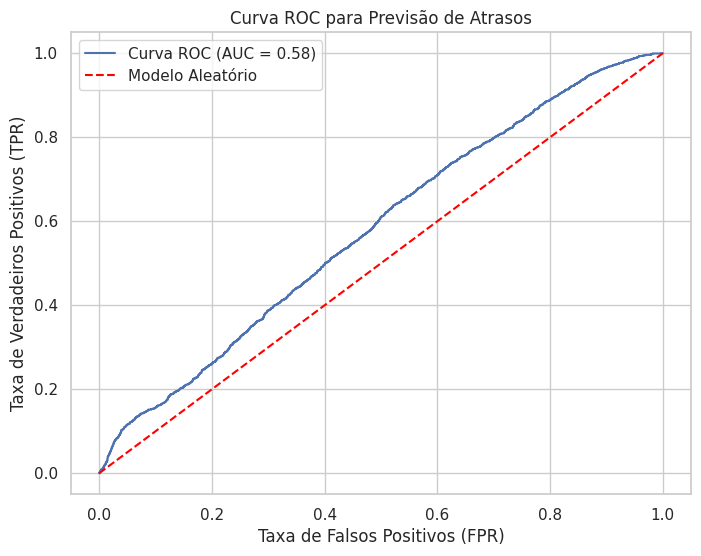

Área sob a curva ROC (AUC): 0.58


In [159]:
# Visualizar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Modelo Aleatório') # Linha de base aleatória
plt.title('Curva ROC para Previsão de Atrasos')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()

print(f"Área sob a curva ROC (AUC): {auc:.2f}")

In [ ]:
# Para segmentação de clientes
# Removendo duplicatas no df_merged antes de agregar para evitar contagem duplicada de itens/pagamentos
df_segmentation = df_merged.drop_duplicates(subset=['order_id', 'order_item_id', 'payment_sequential', 'review_id']).copy()

# Calcular RFM
# Dias desde a última compra
df_recencia = df_segmentation.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
df_recencia.columns = ['customer_id', 'ultima_compra']
data_analise = df_recencia['ultima_compra'].max() + pd.Timedelta(days=1) # Data de análise um dia após a última compra
df_recencia['Recencia'] = (data_analise - df_recencia['ultima_compra']).dt.days

# Frequência: Número total de pedidos por cliente
df_frequencia = df_segmentation.groupby('customer_id')['order_id'].nunique().reset_index()
df_frequencia.columns = ['customer_id', 'Frequencia']

# Valor Monetário: Soma total do valor dos pagamentos por cliente
df_valor = df_segmentation.groupby('customer_id')['payment_value'].sum().reset_index()
df_valor.columns = ['customer_id', 'ValorMonetario']

# Unir as features RFM
df_rfm = df_recencia.merge(df_frequencia, on='customer_id')
df_rfm = df_rfm.merge(df_valor, on='customer_id')

# Nota média de avaliação por cliente
df_nota_media = df_segmentation.groupby('customer_id')['review_score'].mean().reset_index()
df_nota_media.columns = ['customer_id', 'NotaMediaAvaliacao']
df_rfm = df_rfm.merge(df_nota_media, on='customer_id', how='left')

# Tempo médio de entrega por cliente (apenas para pedidos entregues)
df_segmentation_delivered = df_segmentation.dropna(subset=['order_delivered_customer_date', 'order_purchase_timestamp']).copy()
df_segmentation_delivered['tempo_entrega_dias'] = (df_segmentation_delivered['order_delivered_customer_date'] - df_segmentation_delivered['order_purchase_timestamp']).dt.days
df_tempo_medio_entrega = df_segmentation_delivered.groupby('customer_id')['tempo_entrega_dias'].mean().reset_index()
df_tempo_medio_entrega.columns = ['customer_id', 'TempoMedioEntrega']
df_rfm = df_rfm.merge(df_tempo_medio_entrega, on='customer_id', how='left')

# Tratar valores nulos
features_segmentacao = ['Recencia', 'Frequencia', 'ValorMonetario', 'NotaMediaAvaliacao', 'TempoMedioEntrega']
df_clustering = df_rfm[features_segmentacao].copy()

# Tratar valores nulos (pode ser preenchido com a média, mediana, ou removido)
df_clustering.fillna(df_clustering.mean(), inplace=True)

print("Dados preparados para clustering (primeiras linhas):")
display(df_clustering.head())
print(f"Shape dos dados para clustering: {df_clustering.shape}")

# Pré-processamento dos dados: Escalonamento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

print("\nDados escalonados (primeiras 5 linhas e 5 colunas):")
display(pd.DataFrame(X_scaled, columns=features_segmentacao).head())

# Determinando o número ideal de clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = [] # Within-Cluster Sum of Squares
silhouette_scores = []

# Testar diferentes números de clusters (por exemplo, de 1 a 10)
range_n_clusters = range(2, 11)

print("\nCalculando WCSS e Silhouette Scores para diferentes números de clusters...")
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init para evitar problemas de inicialização
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia é o WCSS

    # Calcular Silhouette Score (apenas se n_clusters > 1)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Clusters: {n_clusters}, WCSS: {kmeans.inertia_:.2f}, Silhouette Score: {score:.2f}")

# Plotar o método do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Determinar o Número Ideal de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Plotar Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

print("\nObservação sobre o número de clusters:")
print("O método do cotovelo e o Silhouette Score ajudam a guiar a escolha do número de clusters. Procure por um ponto de inflexão (cotovelo) no gráfico WCSS e o maior Silhouette Score. A escolha final pode depender do contexto de negócio.")

# %%
# Aplicar K-Means com o número de clusters escolhido (exemplo: 4 clusters)
# Based on the plots, let's choose a number of clusters (e.g., 4 or 5 seems reasonable for demonstration)
n_clusters_escolhido = 4 # You should adjust this based on your analysis of the plots

kmeans = KMeans(n_clusters=n_clusters_escolhido, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os rótulos dos clusters de volta ao DataFrame original (df_rfm)
df_rfm['Cluster'] = clusters

print(f"\nClustering K-Means aplicado com {n_clusters_escolhido} clusters.")
print("Contagem de clientes por cluster:")
display(df_rfm['Cluster'].value_counts().sort_index())

# %%
# Analisar o comportamento de cada cluster (características médias de cada feature por cluster)
cluster_profiles = df_rfm.groupby('Cluster')[features_segmentacao].mean()

print("\nPerfis dos Clusters (Médias das Features):")
display(cluster_profiles)

# Opcional: Plotar perfis dos clusters para visualização
cluster_profiles.T.plot(kind='bar', figsize=(12, 7))
plt.title('Perfis dos Clusters')
plt.xlabel('Features')
plt.ylabel('Valor Médio (não escalonado)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Dados preparados para clustering (primeiras linhas):


,Recencia,Frequencia,ValorMonetario,NotaMediaAvaliacao,TempoMedioEntrega
0,288,1,114.74,1.0,13.0
1,410,1,67.41,4.0,9.0
2,548,1,195.42,5.0,5.0
3,379,1,179.35,5.0,28.0
4,150,1,107.01,4.0,11.0


Shape dos dados para clustering: (96462, 5)

Dados escalonados (primeiras 5 linhas e 5 colunas):


,Recencia,Frequencia,ValorMonetario,NotaMediaAvaliacao,TempoMedioEntrega
0,0.313390,0.0,-0.146199,-2.466626,0.094846
1,1.111682,0.0,-0.221952,-0.121920,-0.323899
2,2.014668,0.0,-0.017070,0.659649,-0.742645
3,0.908837,0.0,-0.042790,0.659649,1.665142
4,-0.589596,0.0,-0.158571,-0.121920,-0.114526



Calculando WCSS e Silhouette Scores para diferentes números de clusters...
Clusters: 2, WCSS: 296332.41, Silhouette Score: 0.44
Clusters: 3, WCSS: 235627.49, Silhouette Score: 0.33
Clusters: 4, WCSS: 205195.41, Silhouette Score: 0.33
Clusters: 5, WCSS: 171441.40, Silhouette Score: 0.35


In [ ]:
# Criação de visualizações que podem servir como componentes de dashboards para responder às necessidades de negócio.
df_viz = df_merged.copy()
df_viz['order_purchase_timestamp'] = pd.to_datetime(df_viz['order_purchase_timestamp'])
df_viz['order_delivered_customer_date'] = pd.to_datetime(df_viz['order_delivered_customer_date'])
df_viz['order_estimated_delivery_date'] = pd.to_datetime(df_viz['order_estimated_delivery_date'])

# Criar coluna de mês/ano para a evolução das vendas
df_viz['mes_pedido'] = df_viz['order_purchase_timestamp'].dt.to_period('M').astype(str) # Converte para string para Plotly

# Calcular o tempo de entrega em dias para análise de vendedor
df_viz['tempo_entrega_dias'] = (df_viz['order_delivered_customer_date'] - df_viz['order_purchase_timestamp']).dt.days

# Limpar dados removendo linhas com valores essenciais nulos para as visualizações
df_viz_clean = df_viz.dropna(subset=['mes_pedido', 'customer_state', 'product_category_name_english', 'review_score', 'tempo_entrega_dias', 'price', 'seller_id']).copy()

print("\nDados preparados para Visualizações (primeiras linhas):")
display(df_viz_clean.head())

In [ ]:
# Evolução das Vendas ao Longo do Tempo
# Agrupar por mês para obter o volume de pedidos
volume_pedidos_mes = df_viz_clean['mes_pedido'].value_counts().sort_index().reset_index()
volume_pedidos_mes.columns = ['mes_pedido', 'volume_pedidos']

# Visualização com Plotly Express
fig_evolucao_vendas = px.line(volume_pedidos_mes, x='mes_pedido', y='volume_pedidos',
                              title='Evolução do Volume de Pedidos por Mês')
fig_evolucao_vendas.update_xaxes(title_text='Mês')
fig_evolucao_vendas.update_yaxes(title_text='Número de Pedidos')
fig_evolucao_vendas.show()

print("Observação: Este gráfico mostra a tendência geral. Filtros por estado e categoria seriam implementados em um ambiente de dashboard.")

In [ ]:
# Concentração de Vendas por Estado do Cliente (Mapa de Calor)
# Contar o volume de pedidos por estado do cliente
volume_pedidos_por_estado = df_viz_clean.groupby('customer_state')['order_id'].nunique().reset_index()
volume_pedidos_por_estado.columns = ['estado', 'volume_pedidos']

print("\nVolume de pedidos por estado do cliente (Top 10):")
display(volume_pedidos_por_estado.sort_values(by='volume_pedidos', ascending=False).head(10))

In [ ]:
import json
# Assumindo que você tem um arquivo geojson chamado 'br_states.geojson'
 try:
     with open('br_states.geojson', 'r') as f:
         brazil_states_geojson = json.load(f)

     fig_mapa_calor_estados = px.choropleth(volume_pedidos_por_estado,
                                            geojson=brazil_states_geojson,
                                            locations='estado', # Coluna no DataFrame
                                            featureidkey="properties.SIGLA", # Propriedade no geojson
                                            color='volume_pedidos', # Coluna para colorir o mapa
                                            color_continuous_scale="Viridis",
                                            scope="south america", # Foco na América do Sul
                                            title='Concentração de Pedidos por Estado do Cliente')
     fig_mapa_calor_estados.update_geos(fitbounds="locations", visible=False) # Ajustar zoom para os estados
     fig_mapa_calor_estados.show()

 except FileNotFoundError:
     print("\nArquivo 'br_states.geojson' não encontrado. Não foi possível gerar o mapa de calor dos estados.")
     print("Para gerar o mapa de calor, baixe um arquivo geojson dos estados brasileiros e coloque-o no mesmo diretório.")

print("\nObservação: A criação de um mapa de calor geográfico interativo requer um arquivo geojson dos estados brasileiros. O código acima mostra a estrutura necessária, mas não será executado sem o arquivo geojson.")
print("Como alternativa, podemos mostrar a concentração usando um gráfico de barras simples por estado.")

# Alternativa: Gráfico de barras para concentração de vendas por estado
fig_barras_concentracao = px.bar(volume_pedidos_por_estado.sort_values(by='volume_pedidos', ascending=False).head(20),
                                 x='volume_pedidos', y='estado', orientation='h',
                                 title='Top 20 Estados com Maior Volume de Pedidos')
fig_barras_concentracao.update_xaxes(title_text='Volume de Pedidos')
fig_barras_concentracao.update_yaxes(title_text='Estado do Cliente', categoryorder='total ascending')
fig_barras_concentracao.show()

In [ ]:
# Alternativa: Gráfico de barras para concentração de vendas por estado
fig_barras_concentracao = px.bar(volume_pedidos_por_estado.sort_values(by='volume_pedidos', ascending=False).head(20),
                                 x='volume_pedidos', y='estado', orientation='h',
                                 title='Top 20 Estados com Maior Volume de Pedidos')
fig_barras_concentracao.update_xaxes(title_text='Volume de Pedidos')
fig_barras_concentracao.update_yaxes(title_text='Estado do Cliente', categoryorder='total ascending')
fig_barras_concentracao.show()

# Relação entre Avaliação do Cliente e Tempo de Entrega
fig_nota_tempo_viz = px.scatter(df_viz_clean, x='tempo_entrega_dias', y='review_score',
                                title='Nota de Avaliação vs. Tempo de Entrega',
                                labels={'tempo_entrega_dias': 'Tempo de Entrega (dias)', 'review_score': 'Nota de Avaliação'},
                                opacity=0.5,
                                hover_data=['order_id', 'customer_state', 'seller_state']) # Adicionar infos úteis ao hover
fig_nota_tempo_viz.show()

# Box Plot da Nota de Avaliação por Faixa de Tempo de Entrega
bins = [0, 5, 10, 15, 20, 30, 60, 90, df_viz_clean['tempo_entrega_dias'].max()]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-60', '61-90', '>90']
df_viz_clean['faixa_tempo_entrega'] = pd.cut(df_viz_clean['tempo_entrega_dias'], bins=bins, labels=labels, right=True)

# Remover faixas nulas que podem surgir se o tempo de entrega for fora dos bins
df_viz_clean_faixas = df_viz_clean.dropna(subset=['faixa_tempo_entrega']).copy()

fig_boxplot_nota_tempo = px.box(df_viz_clean_faixas, x='faixa_tempo_entrega', y='review_score',
                                title='Distribuição da Nota de Avaliação por Faixa de Tempo de Entrega',
                                labels={'faixa_tempo_entrega': 'Faixa de Tempo de Entrega (dias)', 'review_score': 'Nota de Avaliação'},
                                category_orders={'faixa_tempo_entrega': labels}) # Manter a ordem correta das faixas
fig_boxplot_nota_tempo.show()

print("Observação: Ambos os gráficos mostram a clara tendência de notas menores para tempos de entrega maiores.")

In [ ]:
# Dashboard de Análise de Vendedores
# Agrega métricas de desempenho por vendedor (ou estado do vendedor) e visualiza.

df_vendedores_agg = df_viz_clean.groupby('seller_id').agg(
    volume_pedidos=('order_id', 'nunique'), # Contagem de pedidos únicos por vendedor
    satisfacao_media=('review_score', 'mean'), # Média da nota de avaliação
    tempo_medio_entrega=('tempo_entrega_dias', 'mean'), # Média do tempo de entrega
    faturamento_total=('price', 'sum') # Soma do preço dos itens vendidos
).reset_index()

# Adicionar contagem de itens vendidos também
df_vendedores_agg['itens_vendidos'] = df_viz_clean.groupby('seller_id').size().reset_index(name='itens_vendidos')['itens_vendidos']

print("\nMétricas agregadas por vendedor (primeiras linhas):")
display(df_vendedores_agg.head())

In [ ]:
# Visualização: Top 10 Vendedores por Volume de Pedidos
fig_top_vendedores_volume = px.bar(df_vendedores_agg.sort_values(by='volume_pedidos', ascending=False).head(10),
                                   x='volume_pedidos', y='seller_id', orientation='h',
                                   title='Top 10 Vendedores por Volume de Pedidos')
fig_top_vendedores_volume.update_xaxes(title_text='Volume de Pedidos')
fig_top_vendedores_volume.update_yaxes(title_text='ID do Vendedor', categoryorder='total ascending')
fig_top_vendedores_volume.show()

# Visualização: Top 10 Vendedores por Faturamento Total
fig_top_vendedores_faturamento = px.bar(df_vendedores_agg.sort_values(by='faturamento_total', ascending=False).head(10),
                                        x='faturamento_total', y='seller_id', orientation='h',
                                        title='Top 10 Vendedores por Faturamento Total')
fig_top_vendedores_faturamento.update_xaxes(title_text='Faturamento Total')
fig_top_vendedores_faturamento.update_yaxes(title_text='ID do Vendedor', categoryorder='total ascending')
fig_top_vendedores_faturamento.show()

# Visualização: Distribuição da Satisfação Média dos Vendedores
min_pedidos_para_media = 10 # Exemplo: considerar vendedores com pelo menos 10 pedidos
df_vendedores_suficientes = df_vendedores_agg[df_vendedores_agg['volume_pedidos'] >= min_pedidos_para_media].copy()

fig_hist_satisfacao_vendedores = px.histogram(df_vendedores_suficientes, x='satisfacao_media', nbins=20,
                                              title=f'Distribuição da Satisfação Média dos Vendedores (com >= {min_pedidos_para_media} pedidos)')
fig_hist_satisfacao_vendedores.update_xaxes(title_text='Satisfação Média')
fig_hist_satisfacao_vendedores.update_yaxes(title_text='Número de Vendedores')
fig_hist_satisfacao_vendedores.show()

# Visualização: Satisfação Média vs. Volume de Pedidos (para ver se vendedores com mais volume têm notas diferentes)
fig_scatter_satisfacao_volume = px.scatter(df_vendedores_suficientes, x='volume_pedidos', y='satisfacao_media',
                                           title='Satisfação Média vs. Volume de Pedidos por Vendedor',
                                           labels={'volume_pedidos': 'Volume de Pedidos', 'satisfacao_media': 'Satisfação Média'},
                                           hover_name='seller_id',
                                           opacity=0.6)
fig_scatter_satisfacao_volume.show()

# Visualização: Distribuição do Tempo Médio de Entrega dos Vendedores
fig_hist_tempo_entrega_vendedores = px.histogram(df_vendedores_suficientes, x='tempo_medio_entrega', nbins=30,
                                                 title=f'Distribuição do Tempo Médio de Entrega dos Vendedores (com >= {min_pedidos_para_media} pedidos)')
fig_hist_tempo_entrega_vendedores.update_xaxes(title_text='Tempo Médio de Entrega (dias)')
fig_hist_tempo_entrega_vendedores.update_yaxes(title_text='Número de Vendedores')
fig_hist_tempo_entrega_vendedores.show()

# Visualização: Tempo Médio de Entrega vs. Satisfação Média (para ver se tempo de entrega impacta a nota média do vendedor)
fig_scatter_tempo_satisfacao = px.scatter(df_vendedores_suficientes, x='tempo_medio_entrega', y='satisfacao_media',
                                          title='Tempo Médio de Entrega vs. Satisfação Média por Vendedor',
                                          labels={'tempo_medio_entrega': 'Tempo Médio de Entrega (dias)', 'satisfacao_media': 'Satisfação Média'},
                                          hover_name='seller_id',
                                          opacity=0.6)
fig_scatter_tempo_satisfacao.show()

print("\nObservação: Os gráficos acima fornecem componentes visuais para analisar o desempenho dos vendedores em termos de volume, faturamento, satisfação e tempo de entrega. A montagem final em um dashboard interativo exigiria ferramentas específicas como Dash.")